# ER NETWORK

In [24]:
from To_sim.for_multi import get_r_sigma_Z
import numpy as np


from To_sim.for_multi import get_r_sigma_Z_MF
import numpy as np
import parmap
from tqdm.notebook import tqdm
import networkx as nx
import matplotlib.pyplot as plt
N = 1000
omega = 1

In [18]:
# 초기 네트워크 생성 파라미터 설정
num_nodes = 1000
p = 6 / (num_nodes - 1)

def generate_network(num_nodes, p):
    while True:
        # ER 네트워크 생성
        G = nx.erdos_renyi_graph(num_nodes, p)
        
        # 외부 링크가 없는 노드 제거
        G.remove_nodes_from(list(nx.isolates(G)))
        
        # 노드 수가 1000개가 되면 종료
        if len(G.nodes()) == num_nodes:
            break
    
    return G

# 네트워크 생성
G = generate_network(num_nodes, p)

In [19]:
A = nx.adjacency_matrix(G)
Aij = A.todense()
Deg = Aij.sum(axis=1)
DegT = Deg.reshape(-1,1)
mk = Deg.mean()
print(mk)

6.11


/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_24360/3818068186.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [22]:
K = 5
t_end = 200
dt = 0.1
t = np.arange(0, t_end+dt/2, dt)

In [23]:
seed =0 

db = 0.04
Ds = np.linspace(0,K*0.8,31)
bs = np.arange(0,1+0.1*K+db/2,db*2)
len(Ds), len(bs)

(31, 19)

In [ ]:
Aij = A.todense()
Deg = Aij.sum(axis=1)
DegT = Deg.reshape(-1,1)
mk = Deg.mean()

np.random.seed(seed)
theta_random = np.random.uniform(0,2*np.pi,N)

th = len(t)//2
D_rij = []
D_sigmaij = []
D_chiij = []
for D in tqdm(Ds):
    D_rs = []
    D_sigmas = []    
    D_chis = []
    for r_m,sigma,chi in parmap.map(get_r_sigma_Z,bs,theta_random,t,D,omega,N,K,mk,Aij,pm_pbar=False, pm_processes=10):
        D_rs.append(r_m)
        D_sigmas.append(sigma)
        D_chis.append(chi)
    D_rij.append(D_rs)
    D_sigmaij.append(D_sigmas)
    D_chiij.append(D_chis)      

D_rij = np.array(D_rij)
D_sigmaij = np.array(D_sigmaij)
D_chiij = np.array(D_chiij)
np.savez(f'DATA/ER N = {N} mk = {mk} db={db} K = {K} {seed:03d}',Ds=Ds,bs=bs,D_mrij=D_rij,D_sij = D_sigmaij,D_chiij=D_chiij,G = G)
CS  = plt.pcolormesh(Ds,bs,abs(D_chiij).T)
plt.show()

# SF DATA

In [ ]:
m = 3
G = nx.barabasi_albert_graph(N,m)
A = nx.adjacency_matrix(G)
Aij = A.todense()
Deg = Aij.sum(axis=1)
DegT = Deg.reshape(-1,1)
mk = Deg.mean()
th = len(t)//2

D_rij = []
D_sigmaij = []
D_chiij = []
for D in tqdm(Ds):
    D_rs = []
    D_sigmas = []    
    D_chis = []
    for r_m,sigma,chi in parmap.map(get_r_sigma_Z,bs,theta_random,t,D,omega,N,K,mk,Aij,pm_pbar=False, pm_processes=8):
        D_rs.append(r_m)
        D_sigmas.append(sigma)
        D_chis.append(chi)
    D_rij.append(D_rs)
    D_sigmaij.append(D_sigmas)
    D_chiij.append(D_chis)

D_rij = np.array(D_rij)
D_sigmaij = np.array(D_sigmaij)
D_chiij = np.array(D_chiij)
np.savez(f'DATA/SF N = {N} m = {m} db={db} {seed:03d}',Ds=Ds,bs=bs,D_mrij=D_rij,D_sij = D_sigmaij,D_chiij=D_chiij,G = G)
CS  = plt.pcolormesh(2*Ds,bs,abs(D_chiij).T)
plt.title(f'm={m}')
plt.show()

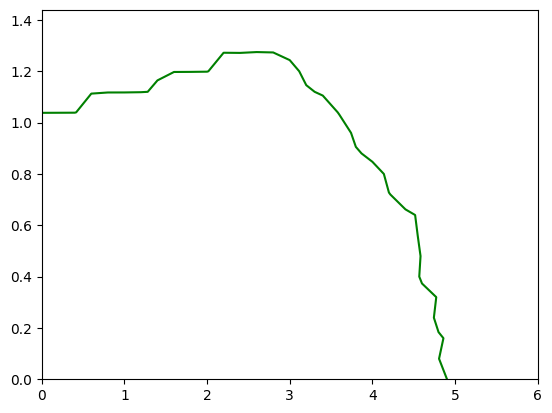

In [26]:
AR_MF = np.load('DATA/MF N = 1000 db=0.04 K = 5 000.npz')
plt.contour(2*AR_MF['Ds'],AR_MF['bs'],AR_MF['D_chiij'].T,levels=[10],colors='green')

# AR_ER = np.load('ER_AR/N = 1000 mk = 5.988 db=0.04 K = 1 ER 000.npz')
# plt.contour(2*AR_ER['Ds'],AR_ER['bs'],AR_ER['D_chiij'].T,levels=[20],colors='green')

# AR_SF = np.load('SF_AR/ensemble/N = 1000 m = 3 db=0.02 SF 000.npz')
# plt.contour(2*AR_SF['Ds'],AR_SF['bs'],AR_SF['D_chiij'].T,levels=[20],colors='blue')
# # plt.contour(2*Az_er['Ds'],Az_er['bs'],abs(Az_er['D_mrij']-Az_er['D_sij']).T,levels=[0.02])